In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings 
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gold-price-and-relevant-metrics/Gold Price Prediction.csv


In [76]:
df=pd.read_csv("/kaggle/input/gold-price-and-relevant-metrics/Gold Price Prediction.csv",index_col=["Date"],parse_dates=["Date"],dayfirst=False)
print(f"{df.shape}\n")
df.info()

(676, 20)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 676 entries, 2024-08-07 to 2022-01-03
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Price 2 Days Prior                      676 non-null    float64
 1   Price 1 Day Prior                       676 non-null    float64
 2   Price Today                             676 non-null    float64
 3   Price Tomorrow                          675 non-null    float64
 4   Price Change Tomorrow                   675 non-null    float64
 5   Price Change Ten                        666 non-null    float64
 6   Std Dev 10                              667 non-null    float64
 7   Twenty Moving Average                   676 non-null    float64
 8   Fifty Day Moving Average                676 non-null    float64
 9   200 Day Moving Average                  676 non-null    float64
 10  Monthly Inflation Rate          

In [77]:
df.sort_index(ascending=True,inplace=True)
df.dropna(inplace=True)
df

,Price 2 Days Prior,Price 1 Day Prior,Price Today,Price Tomorrow,Price Change Tomorrow,Price Change Ten,Std Dev 10,Twenty Moving Average,Fifty Day Moving Average,200 Day Moving Average,Monthly Inflation Rate,EFFR Rate,Volume,Treasury Par Yield Month,Treasury Par Yield Two Year,Treasury Par Yield Curve Rates (10 Yr),DXY,SP Open,VIX,Crude
Date,,,,,,,,,,,,,,,,,,,,
2022-01-14,1825.36,1821.16,1817.43,1819.22,1.79,-25.32,11.431082,905.1400,362.0560,90.51400,7.5,0.10,72,0.05,0.99,1.78,94.87,4637.99,20.11,81.73
2022-01-17,1821.16,1817.43,1819.22,1814.33,-4.89,-21.30,11.534875,996.1010,398.4404,99.61010,7.5,0.10,71,0.05,1.02,1.83,95.73,4637.99,20.11,81.73
2022-01-18,1817.43,1819.22,1814.33,1838.58,24.25,-13.56,11.544873,1086.8175,434.7270,108.68175,7.5,0.10,71,0.05,1.06,1.87,95.22,4632.24,21.18,84.32
2022-01-19,1819.22,1814.33,1838.58,1839.01,0.43,-30.68,14.271937,1178.7465,471.4986,117.87465,7.5,0.10,73,0.05,1.04,1.83,95.77,4588.03,23.12,86.61
2022-01-20,1814.33,1838.58,1839.01,1834.58,-4.43,-33.25,13.626305,1270.6970,508.2788,127.06970,7.5,0.10,75,0.05,1.08,1.83,95.59,4547.35,23.46,86.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-18,2469.65,2462.44,2442.71,2400.95,-41.76,4.46,38.405274,2373.4090,2358.9954,2158.20535,3.0,5.33,83,5.48,4.46,4.20,103.70,5608.56,14.27,83.11
2024-07-19,2462.44,2442.71,2400.95,2397.05,-3.90,41.79,37.996575,2375.3835,2360.0924,2160.83315,3.0,5.33,79,5.48,4.49,4.25,104.16,5543.37,16.44,82.47
2024-07-22,2442.71,2400.95,2397.05,2409.86,12.81,8.82,34.370081,2379.1965,2360.8238,2163.46460,3.0,5.33,84,5.49,4.50,4.26,104.37,5544.54,16.79,80.39


Correlation Map

<Axes: >

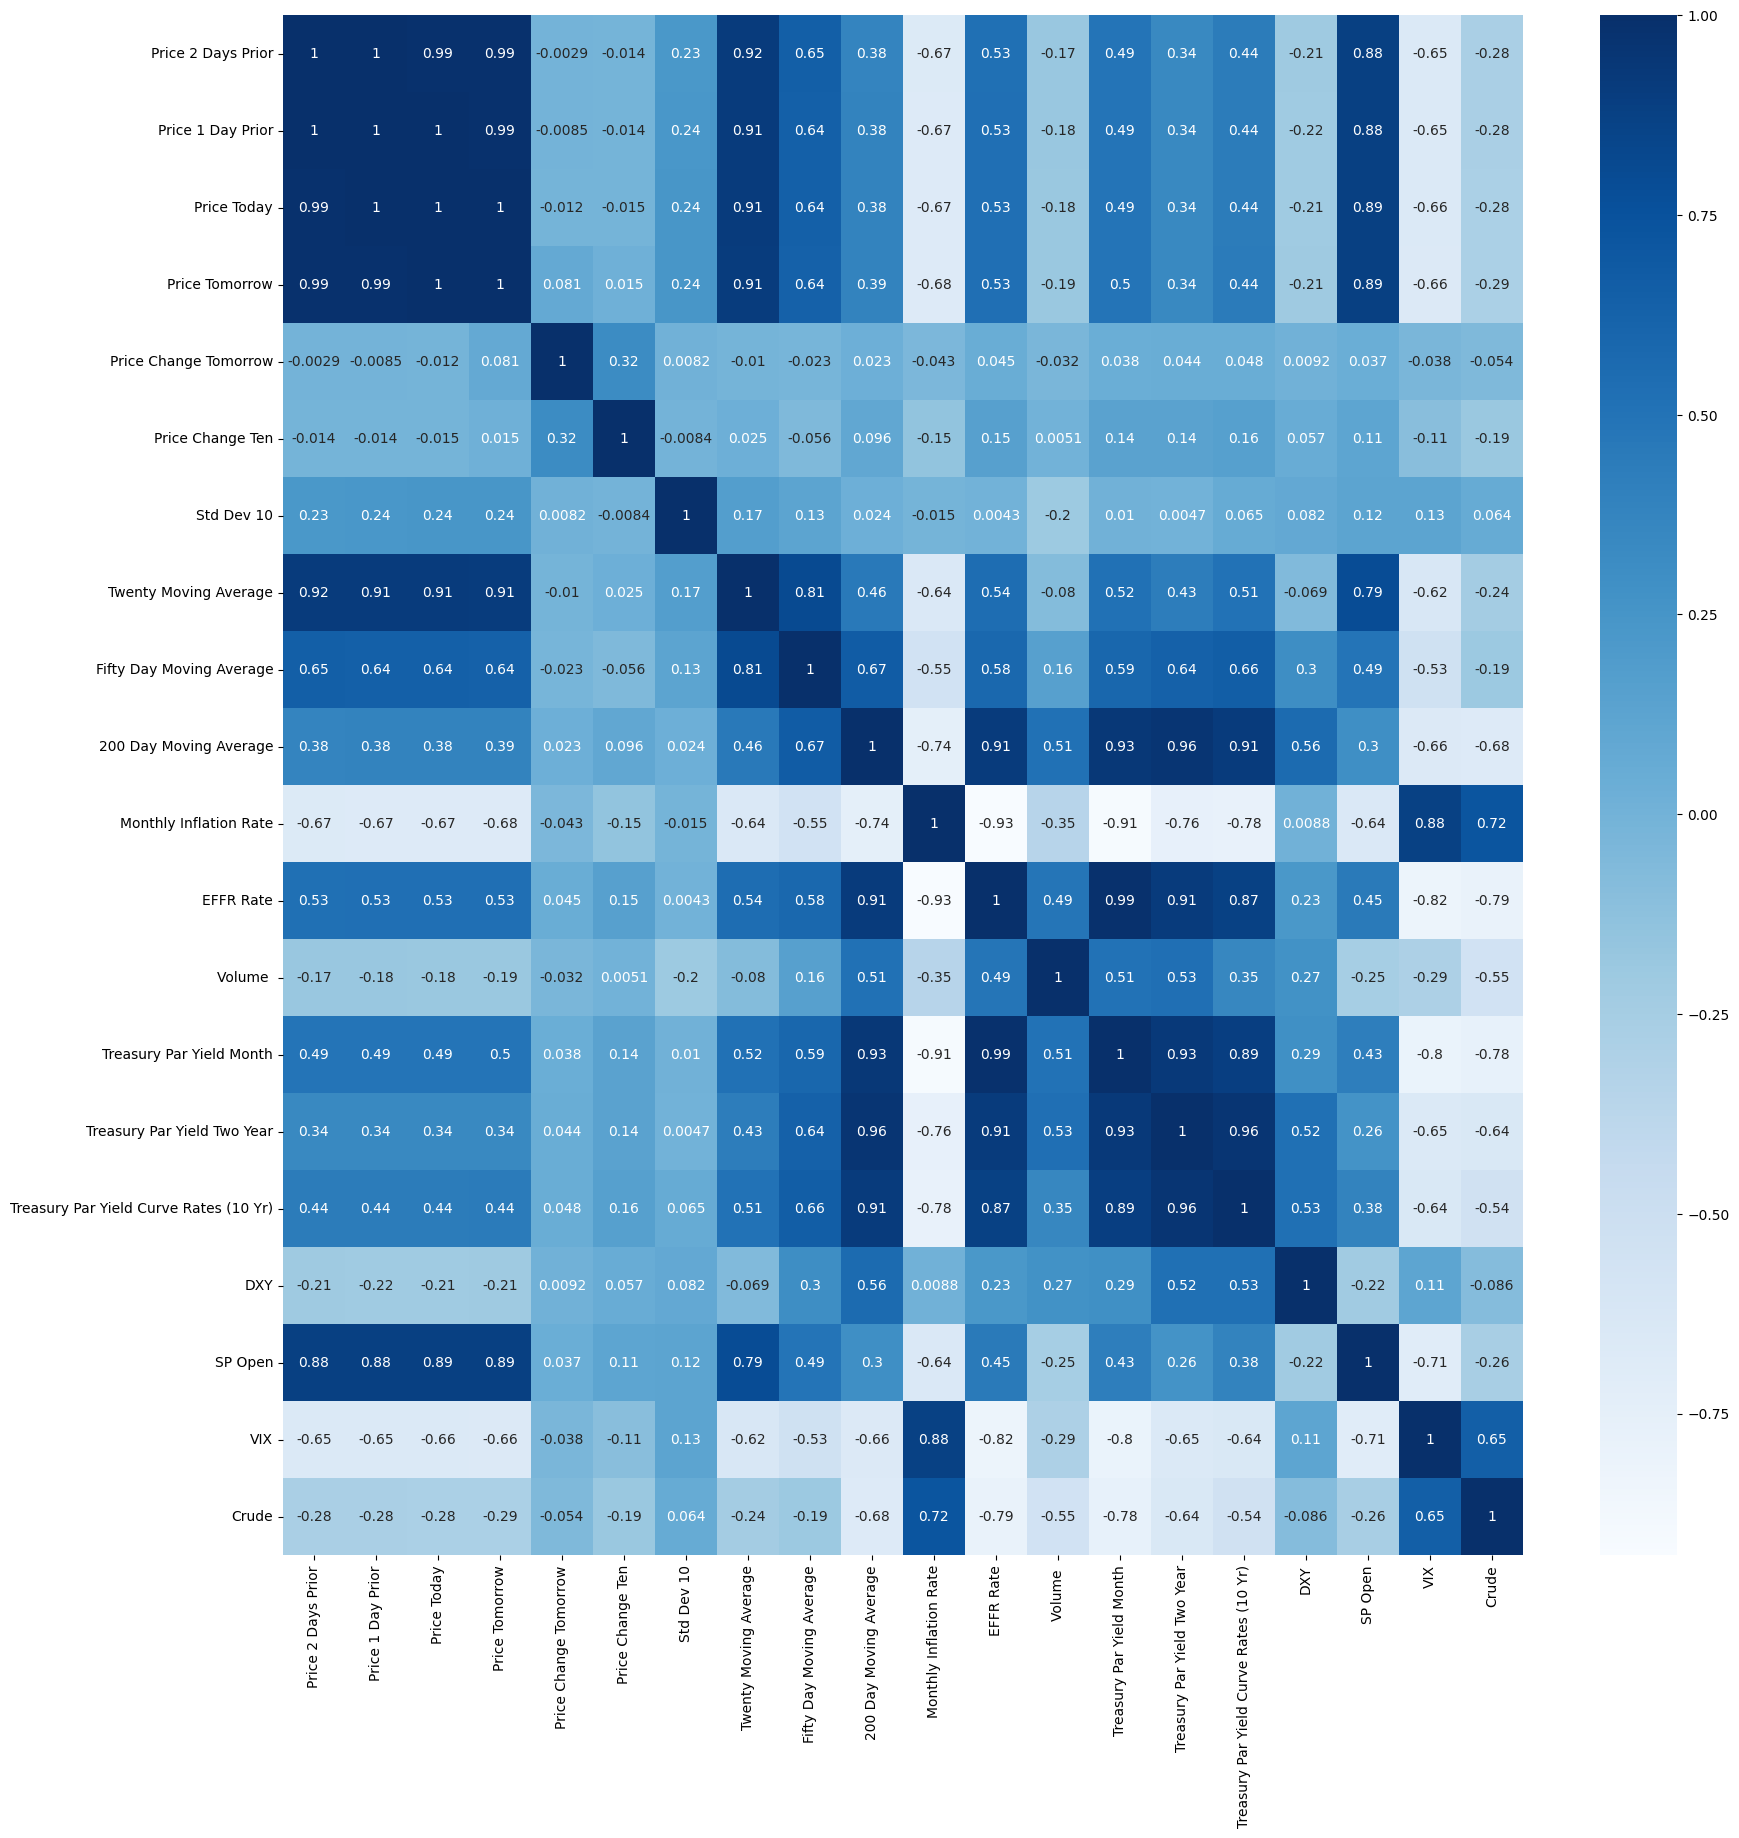

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
corr=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap="Blues",annot=True)

In [79]:
from sklearn.preprocessing import MinMaxScaler

x=df.drop(columns=["Price Today","Price 2 Days Prior","Price 1 Day Prior","Price Tomorrow","Price Change Tomorrow","Price Change Ten"])
y=df["Price Today"]


x_scaler=MinMaxScaler(feature_range=(0,1))
scaled_x=x_scaler.fit_transform(x)

y_scaler=MinMaxScaler(feature_range=(0,1))
scaled_y=y_scaler.fit_transform(y.values.reshape(-1,1))

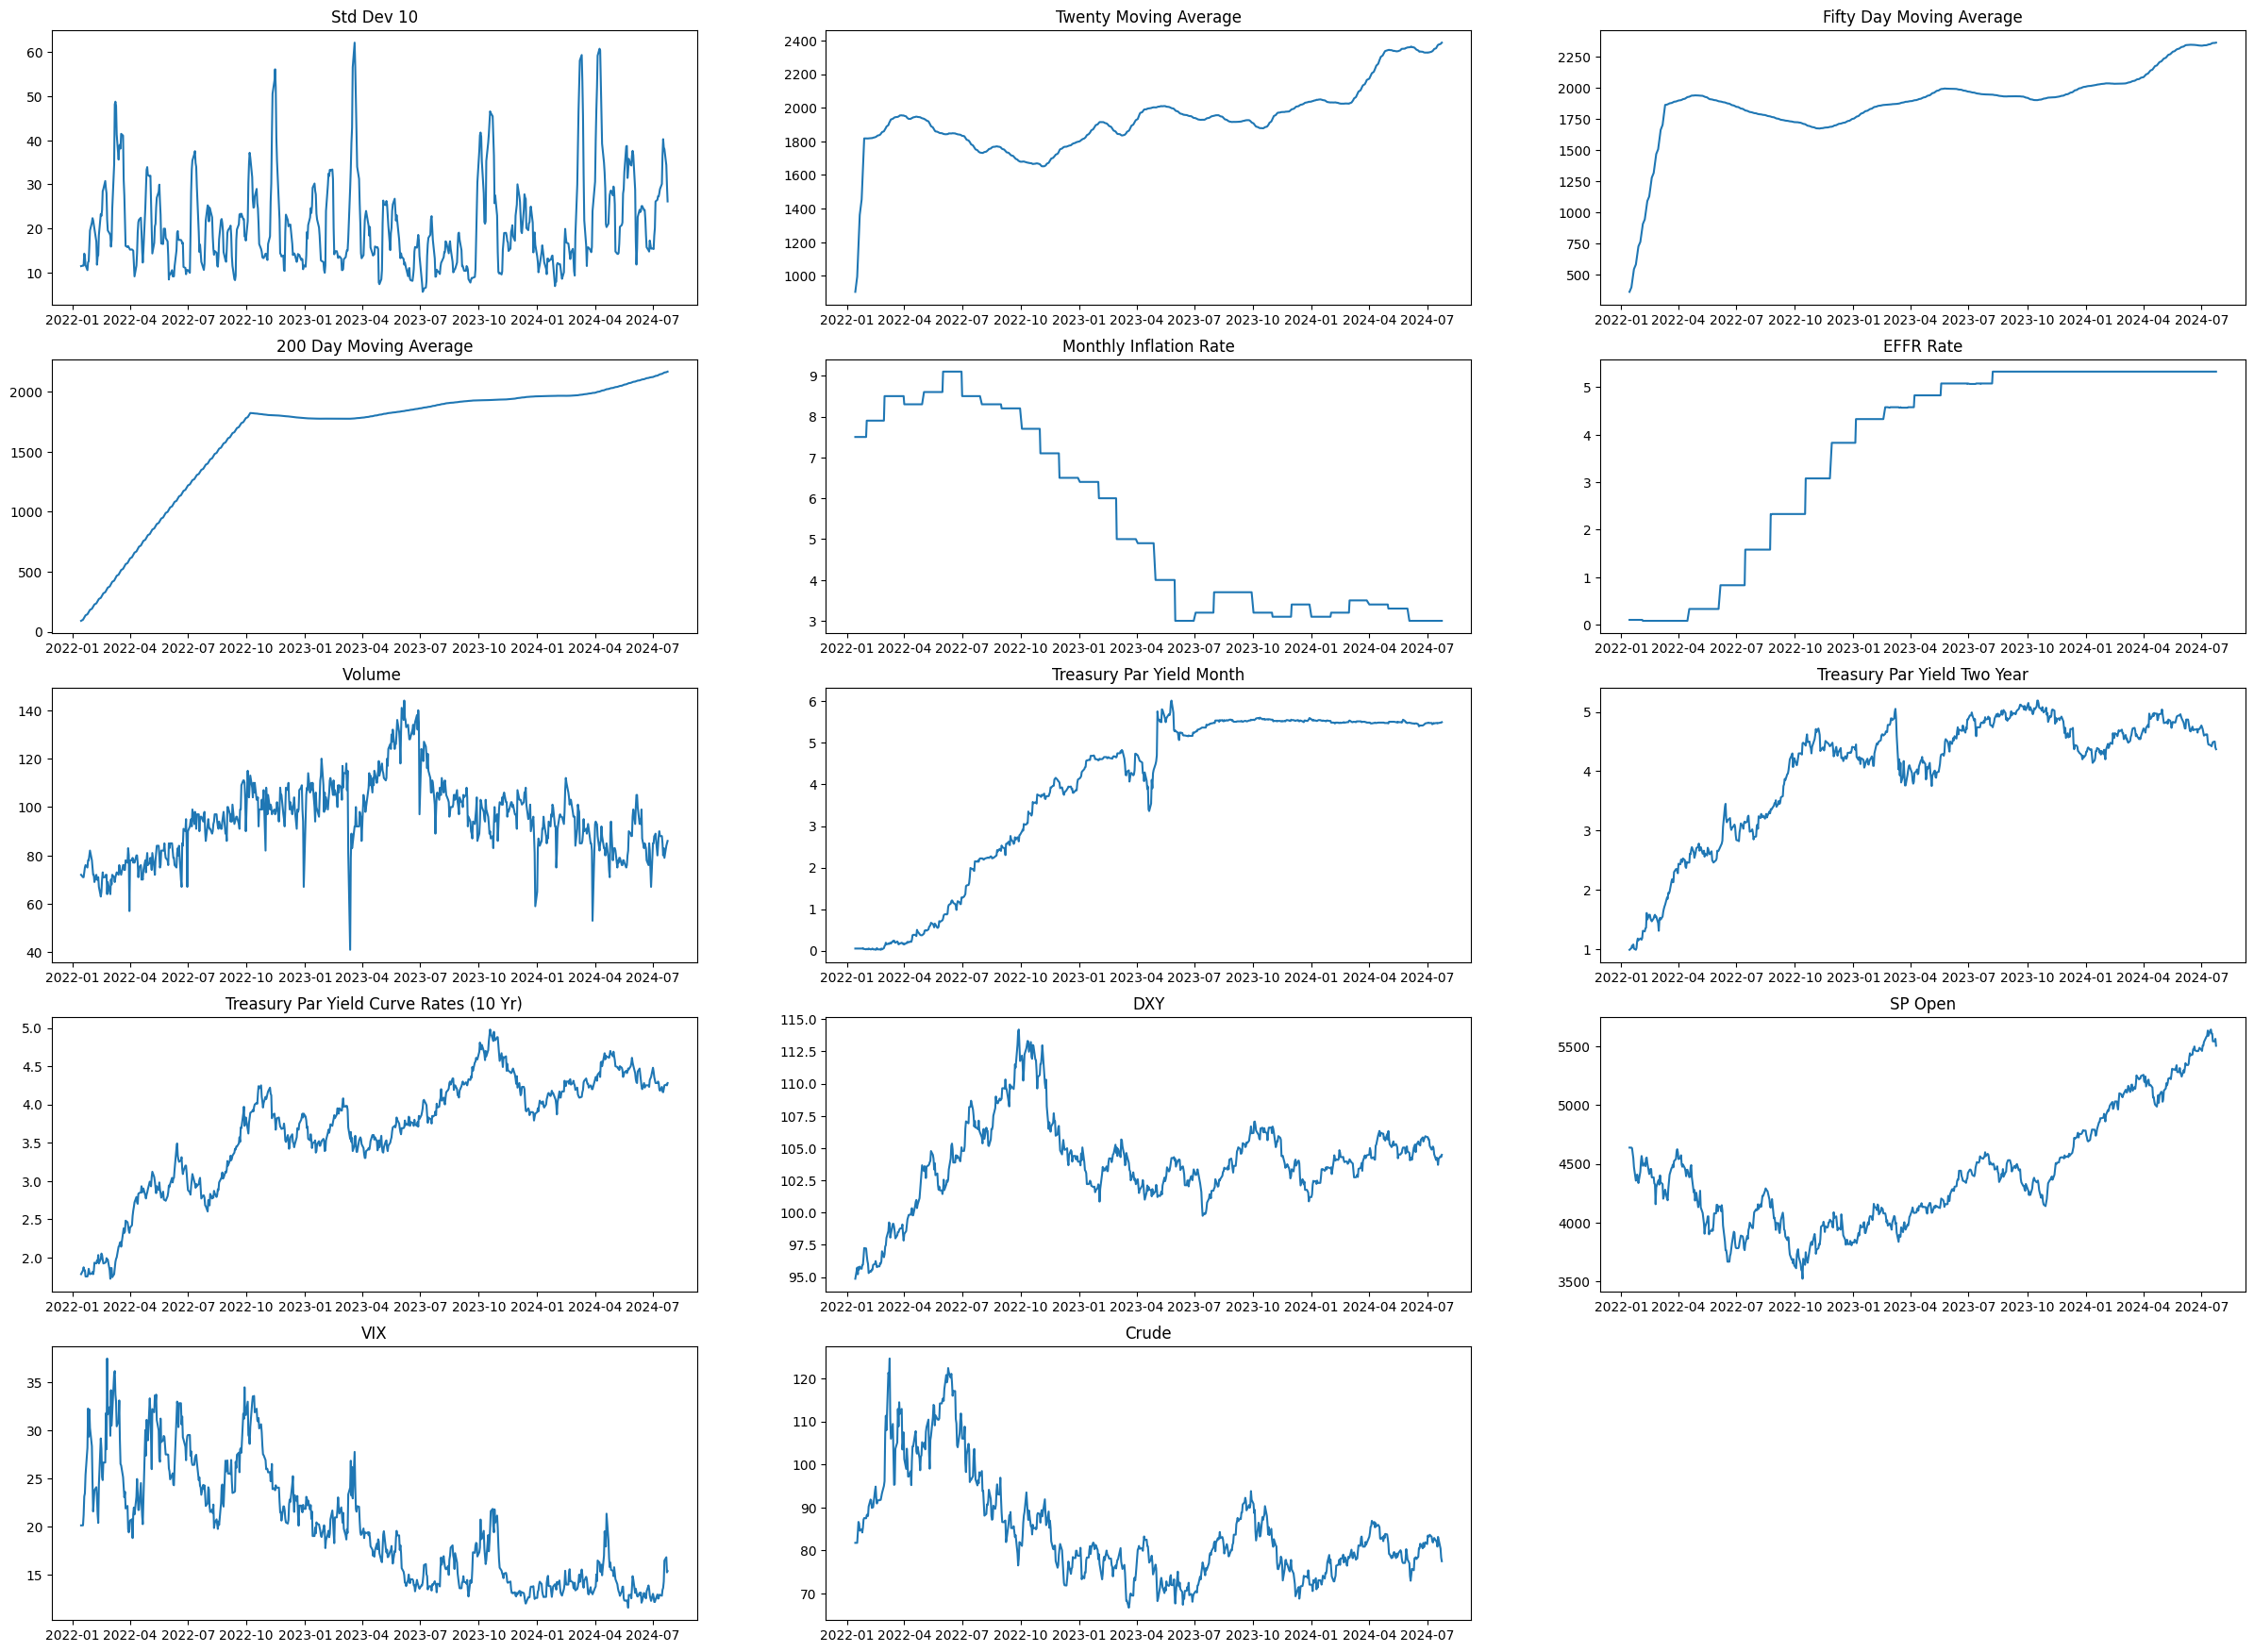

In [80]:
plt.figure(figsize=(30,40))
for i,column in enumerate(x):
    plt.subplot(9,3,i+1)
    plt.title(f"{column}")
    plt.plot(x[column])

<Axes: >

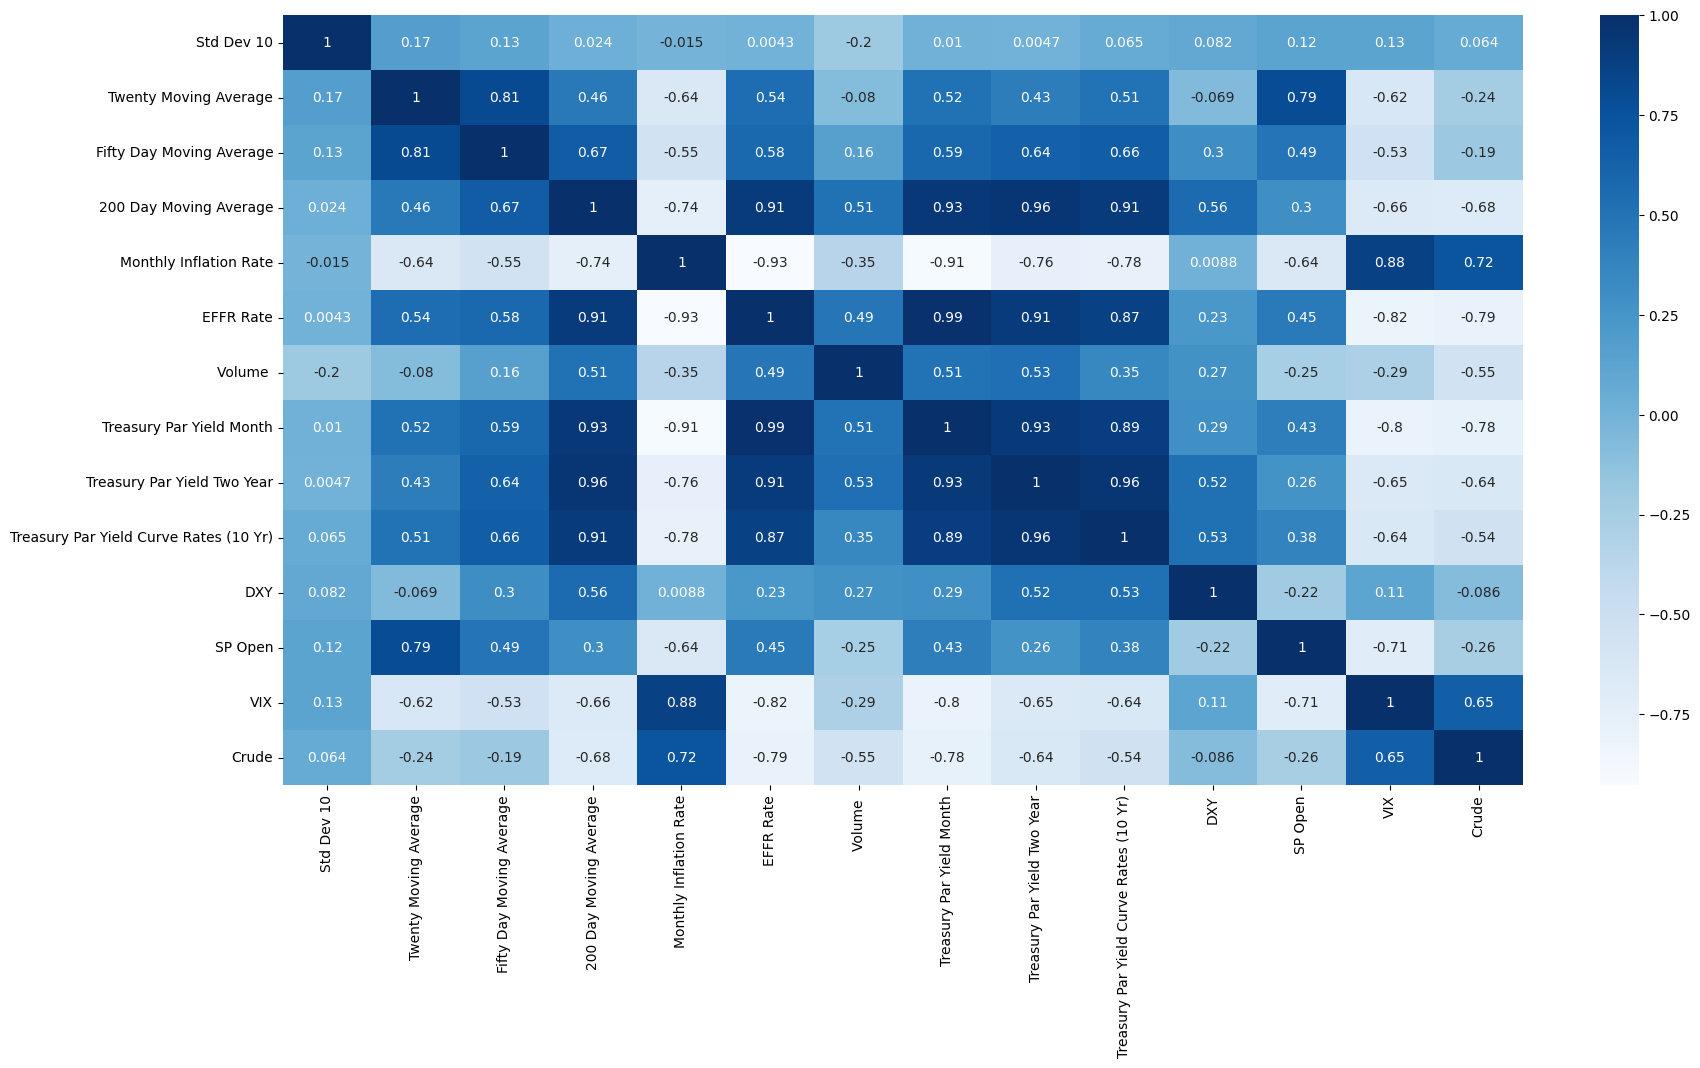

In [81]:
corr=x.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,cmap="Blues",annot=True)

In [82]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
new_x=pca.fit_transform(scaled_x)
sum(pca.explained_variance_ratio_)

0.9401510839136293

In [83]:
import tensorflow as tf
from tensorflow import keras

timestamp=10

def df_to_XandY(timestamp,train,result):
    sequence=[]
    sequence_result=[]
    for i in range(timestamp,len(train)):
        sequence.append(train[i-timestamp:i])
        sequence_result.append(result[i])
    
    return np.array(sequence), np.array(sequence_result)
x_array,y_array=df_to_XandY(timestamp,new_x,scaled_y)
x_train_array=x_array[:580]
y_train_array=y_array[:580]
x_test_array=y_array[580:]
y_test_array=y_array[580:]

x_array.shape

(647, 10, 4)

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

 
model = Sequential()
model.add(LSTM(50, input_shape=(timestamp, x_train_array.shape[2]), return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train_array,y_train_array,epochs=10,batch_size=1)

Epoch 1/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0334
Epoch 2/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0056
Epoch 3/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0041
Epoch 4/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0033
Epoch 5/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0032
Epoch 6/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0031
Epoch 7/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0035
Epoch 8/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0024
Epoch 9/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0031
Epoch 10/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0024


In [85]:
predictions=model.predict(x_array)
predictions.shape

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


(647, 1)

In [86]:
inversed_data=x_scaler.inverse_transform(scaled_x)
inversed_real=y_scaler.inverse_transform(scaled_y)
inversed_predictions=y_scaler.inverse_transform(predictions)

inversed_train_df=pd.DataFrame(inversed_real[10:590],columns=["Price Today Real"],index=df.index[10:590])
inversed_train_df

inversed_predictions_df=pd.DataFrame(inversed_predictions[:580],columns=["Price Today Predictions"],index=df.index[10:590])
inversed_predictions_df

results_df=pd.concat([inversed_train_df,inversed_predictions_df],axis=1)
results_df

,Price Today Real,Price Today Predictions
Date,,
2022-01-28,1792.11,1815.738892
2022-01-31,1797.92,1824.936890
2022-02-01,1800.77,1835.532227
2022-02-02,1807.90,1845.384277
2022-02-03,1805.76,1853.440063
...,...,...
2024-04-15,2381.97,2351.926758
2024-04-16,2382.59,2349.572266
2024-04-17,2367.91,2338.377930


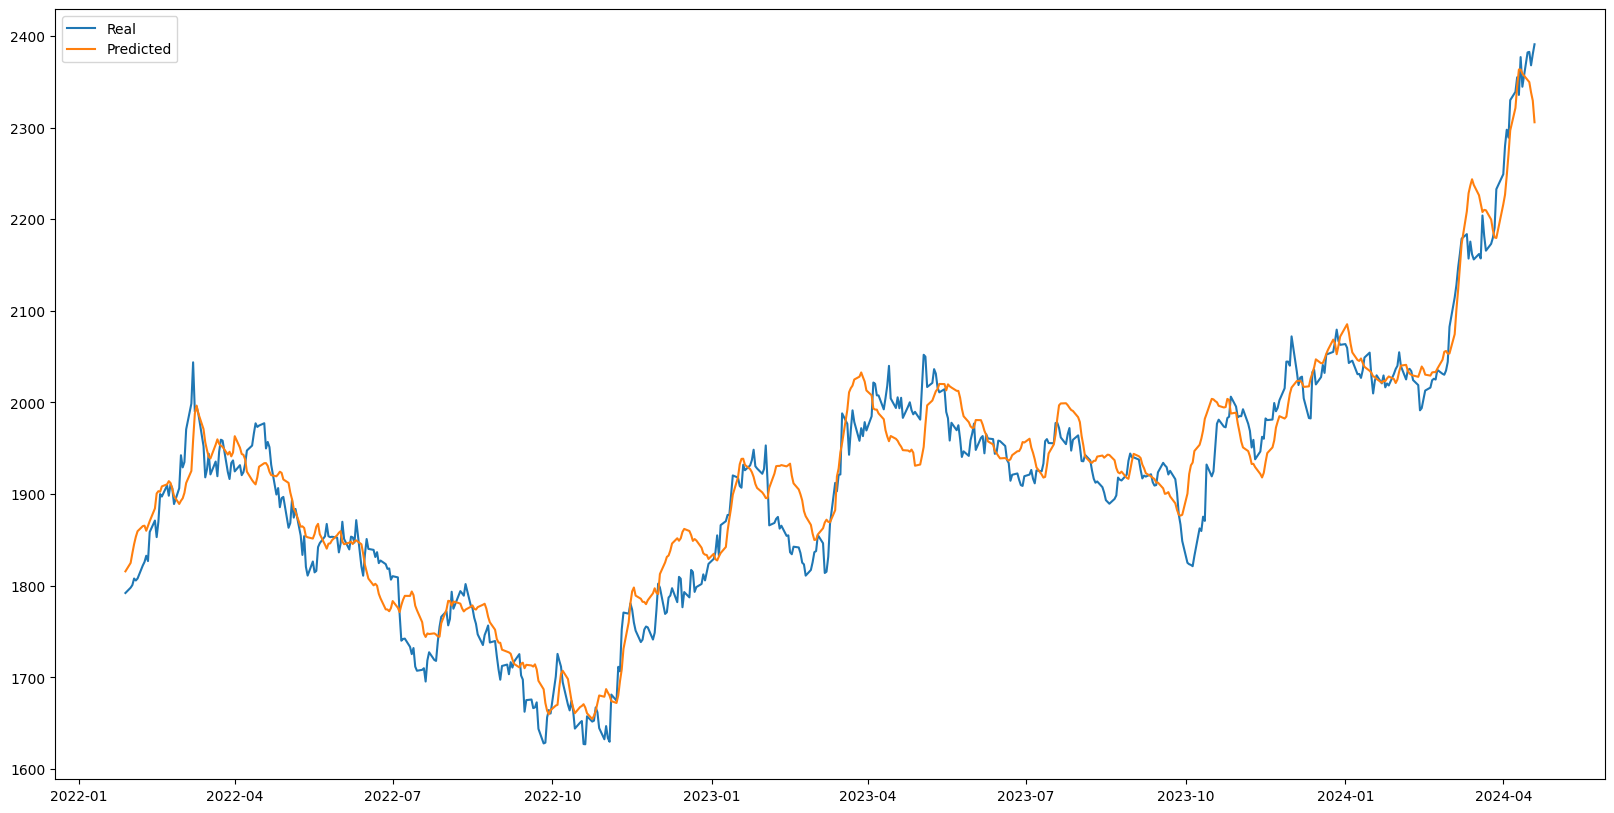

In [87]:
plt.figure(figsize=(20,10))
plt.plot(results_df["Price Today Real"],label="Real")
plt.plot(results_df["Price Today Predictions"],label="Predicted")

plt.legend()

In [88]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
print(mean_absolute_percentage_error(results_df["Price Today Real"],results_df["Price Today Predictions"]))
print(mean_squared_error(results_df["Price Today Real"],results_df["Price Today Predictions"]))


0.014974392709713555
1284.3493551090842


In [96]:
real_y_test=inversed_real[-67:]
inversed_real_y_test_df=pd.DataFrame(real_y_test,columns=["Price Today Real"],index=df.index[-67:])
inversed_predictions_df=pd.DataFrame(inversed_predictions[-67:],columns=["Price Today Predictions"],index=df.index[-67:])

test_results_df=pd.concat([inversed_real_y_test_df,inversed_predictions_df],axis=1)
test_results_df

,Price Today Real,Price Today Predictions
Date,,
2024-04-22,2334.01,2279.848633
2024-04-23,2323.65,2266.051514
2024-04-24,2316.27,2268.174072
2024-04-25,2330.80,2279.726562
2024-04-26,2337.94,2269.760498
...,...,...
2024-07-18,2442.71,2514.662109
2024-07-19,2400.95,2518.151855
2024-07-22,2397.05,2515.094238


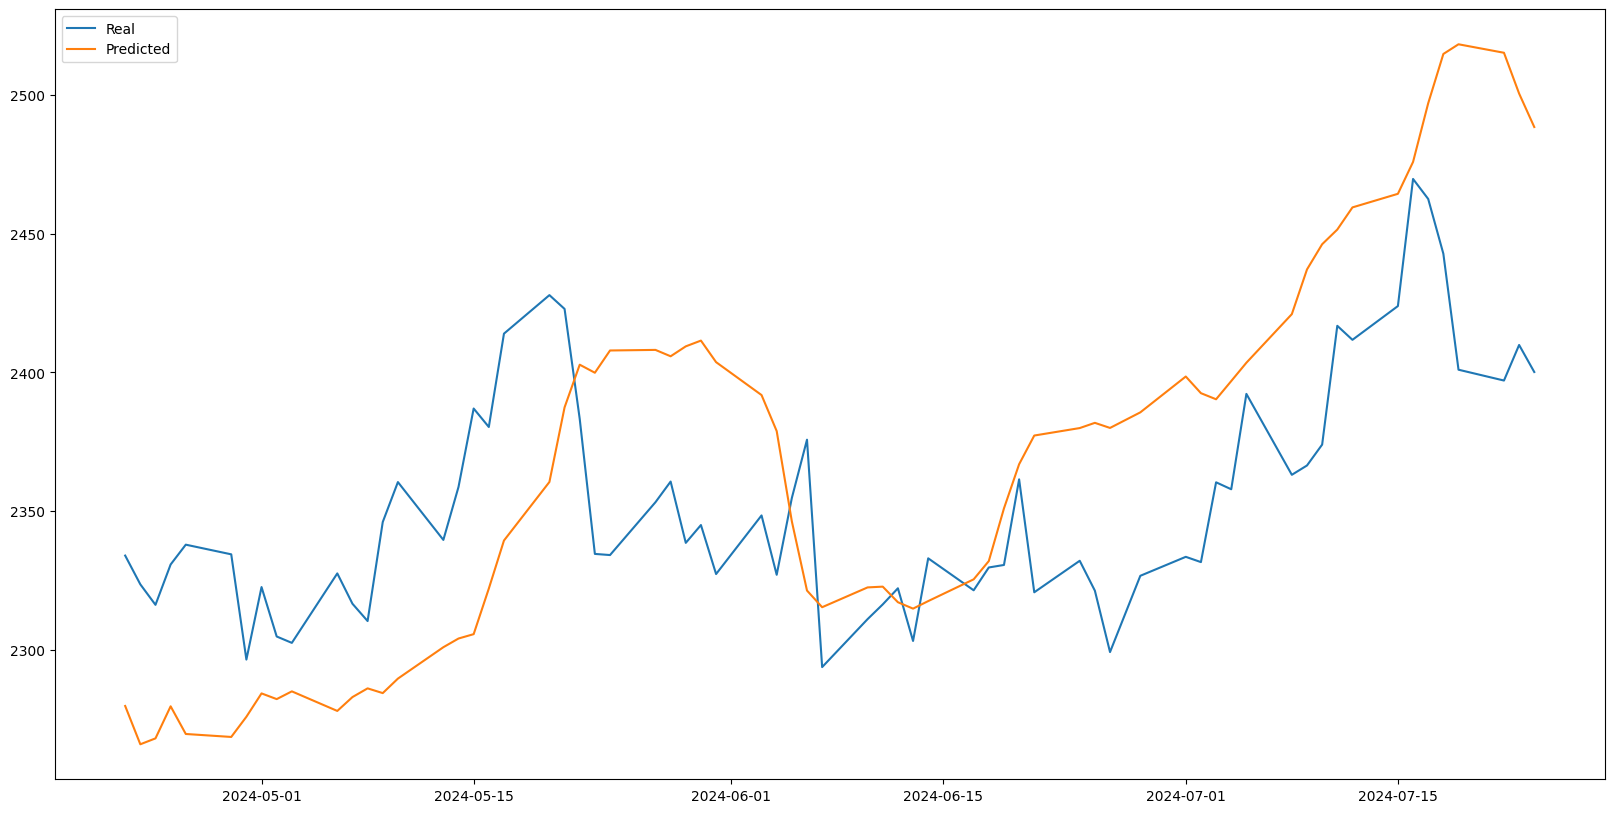

In [97]:
plt.figure(figsize=(20,10))
plt.plot(test_results_df["Price Today Real"],label="Real")
plt.plot(test_results_df["Price Today Predictions"],label="Predicted")

plt.legend()